<a href="https://colab.research.google.com/github/MackPreston/iot-traffic-analysis/blob/main/notebooks/tran_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix as cfmat
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%store -r mixed_flows
%store -r features
y = mixed_flows.is_attack
X = mixed_flows[features]

In [ ]:


kf = KFold(n_splits=10)
kf.get_n_splits(X)
fold_num = 1

# 10-Fold Cross-Validation of Decision Tree Classifier
for train_index, test_index in kf.split(X):
    print("\nResults for Fold #", fold_num)
    print("TRAIN:", train_index, "   TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_predict = dtree.predict(X_test)
    print("Accuracy Score: ", dtree.score(X_test, y_test))
    print(cfmat(y_test, y_predict))
    fold_num += 1




Results for Fold # 1
TRAIN: [ 228067  228068  228069 ... 2280666 2280667 2280668]    TEST: [     0      1      2 ... 228064 228065 228066]
Accuracy Score:  0.9799883367606887
[[ 44771   3184]
 [  1380 178732]]

Results for Fold # 2
TRAIN: [      0       1       2 ... 2280666 2280667 2280668]    TEST: [228067 228068 228069 ... 456131 456132 456133]
Accuracy Score:  0.9624145536180158
[[ 78206    897]
 [  7675 141289]]

Results for Fold # 3
TRAIN: [      0       1       2 ... 2280666 2280667 2280668]    TEST: [456134 456135 456136 ... 684198 684199 684200]
Accuracy Score:  0.9857980330341523
[[102800   1228]
 [  2011 122028]]

Results for Fold # 4
TRAIN: [      0       1       2 ... 2280666 2280667 2280668]    TEST: [684201 684202 684203 ... 912265 912266 912267]
Accuracy Score:  0.9915858059254518
[[ 70107    630]
 [  1289 156041]]

Results for Fold # 5
TRAIN: [      0       1       2 ... 2280666 2280667 2280668]    TEST: [ 912268  912269  912270 ... 1140332 1140333 1140334]
Accuracy S

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)
print("Accuracy Score: ", dtree.score(X_test, y_test))
cfmat(y_test, y_predict)

Accuracy Score:  0.9835294158914566


array([[217273,   4678],
       [  4713, 343504]])

[Text(268.4927371254421, 216.77300613496934, 'X[5] <= 3080.5\ngini = 0.475\nsamples = 1710501\nvalue = [664980, 1045521]'),
 Text(204.47147725121022, 215.43901840490798, 'X[55] <= 8.5\ngini = 0.463\nsamples = 1000832\nvalue = [636770, 364062]'),
 Text(143.7941988399376, 214.10503067484663, 'X[58] <= 5.5\ngini = 0.407\nsamples = 781442\nvalue = [559479, 221963]'),
 Text(98.95341763091331, 212.77104294478528, 'X[33] <= 7327.5\ngini = 0.48\nsamples = 218014\nvalue = [87281, 130733]'),
 Text(80.43059233346835, 211.43705521472393, 'X[10] <= 95.0\ngini = 0.481\nsamples = 129687\nvalue = [77642, 52045]'),
 Text(47.68479341137952, 210.10306748466257, 'X[10] <= 25.5\ngini = 0.498\nsamples = 105559\nvalue = [55793, 49766]'),
 Text(3.400314857589732, 208.76907975460122, 'X[55] <= 4.5\ngini = 0.258\nsamples = 12737\nvalue = [10799, 1938]'),
 Text(2.241788744123955, 207.43509202453987, 'X[21] <= 75.0\ngini = 0.115\nsamples = 9680\nvalue = [9089, 591]'),
 Text(1.5063752214361494, 206.10110429447852,

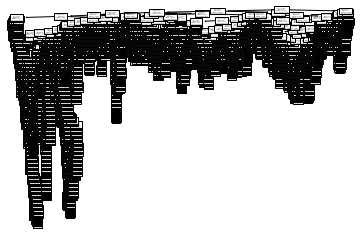

In [ ]:
from sklearn import tree
tree.plot_tree(dtree)